In [1]:
import numpy as np
import pandas as pd
import matplotlib
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_selection
from sklearn.feature_selection import chi2, SelectKBest, f_classif, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from warnings import simplefilter
from sklearn.model_selection import RandomizedSearchCV
import time

### Data Loading

In [2]:
#Loading the dataset

original_dataset = pd.read_csv("C:/Users/fetih.kaya/Desktop/adult_income.csv")
dataset = original_dataset.copy()

dataset.head()

,ID,age,workclass,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_high
0,1,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,No
1,2,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,No
2,3,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,No
3,4,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,No
4,5,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,No


### Explanatory Data Analysis

In [3]:
#General information about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
ID                32561 non-null int64
age               32561 non-null int64
workclass         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_high       32561 non-null object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


***

<font color='red'>
    
**The dataset has;**

-6 numerical and 7 categorical attributes, in total 13 columns

-32.561 rows

-no null values in entries

***

</font>

In [4]:
#Statistical summary of the dataset

dataset.describe()

,ID,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,2.572720,7385.292085,402.960219,12.347429
min,1.000000,17.000000,1.000000,0.000000,0.000000,1.000000
25%,8141.000000,28.000000,9.000000,0.000000,0.000000,40.000000
50%,16281.000000,37.000000,10.000000,0.000000,0.000000,40.000000
75%,24421.000000,48.000000,12.000000,0.000000,0.000000,45.000000
max,32561.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000


Text(0.5, 1.0, 'Distribution of Income Level by Capital_loss ')

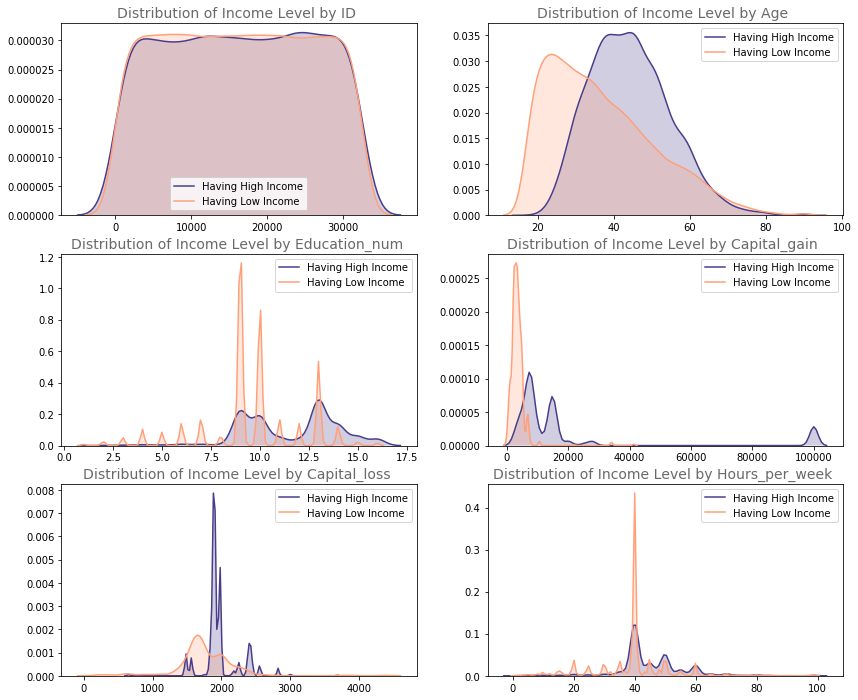

In [5]:
#Distribution of entries in accordance with numerical attributes

fig, ax = plt.subplots(3,2)
fig.set_size_inches(14, 12)

sns.kdeplot(dataset.query('ID > 0 & income_high == "Yes"')['ID'],
             color='darkslateblue', shade=True, label='Having High Income', ax=ax[0,0])
sns.kdeplot(dataset.query('ID > 0 & income_high == "No"')['ID'],
             color='lightsalmon', shade=True, label='Having Low Income', ax=ax[0,0])
ax[0,0].set_title('Distribution of Income Level by ID ', color='dimgrey', size=14)



sns.kdeplot(dataset.query('age > 0 & income_high == "Yes"')['age'],
             color='darkslateblue', shade=True, label='Having High Income', ax=ax[0,1])
sns.kdeplot(dataset.query('age > 0 & income_high == "No"')['age'],
             color='lightsalmon', shade=True, label='Having Low Income', ax=ax[0,1])
ax[0,1].set_title('Distribution of Income Level by Age ', color='dimgrey', size=14)



sns.kdeplot(dataset.query('education_num > 0 & income_high == "Yes"')['education_num'],
             color='darkslateblue', shade=True, label='Having High Income', ax=ax[1,0])
sns.kdeplot(dataset.query('education_num > 0 & income_high == "No"')['education_num'],
             color='lightsalmon', shade=True, label='Having Low Income', ax=ax[1,0])
ax[1,0].set_title('Distribution of Income Level by Education_num ', color='dimgrey', size=14)



sns.kdeplot(dataset.query('capital_gain > 0 & income_high == "Yes"')['capital_gain'],
             color='darkslateblue', shade=True, label='Having High Income', ax=ax[1,1])
sns.kdeplot(dataset.query('capital_gain > 0 & income_high == "No"')['capital_gain'],
             color='lightsalmon', shade=True, label='Having Low Income', ax=ax[1,1])
ax[1,1].set_title('Distribution of Income Level by Capital_gain ', color='dimgrey', size=14)



sns.kdeplot(dataset.query('hours_per_week > 0 & income_high == "Yes"')['hours_per_week'],
             color='darkslateblue', shade=True, label='Having High Income', ax=ax[2,1])
sns.kdeplot(dataset.query('hours_per_week > 0 & income_high == "No"')['hours_per_week'],
             color='lightsalmon', shade=True, label='Having Low Income', ax=ax[2,1])
ax[2,1].set_title('Distribution of Income Level by Hours_per_week ', color='dimgrey', size=14)



sns.kdeplot(dataset.query('capital_loss > 0 & income_high == "Yes"')['capital_loss'],
             color='darkslateblue', shade=True, label='Having High Income', ax=ax[2,0])
sns.kdeplot(dataset.query('capital_loss > 0 & income_high == "No"')['capital_loss'],
             color='lightsalmon', shade=True, label='Having Low Income', ax=ax[2,0])
ax[2,0].set_title('Distribution of Income Level by Capital_loss ', color='dimgrey', size=14)

***

<font color='red'>
    
**The distribution of numerical attributes of the dataset shows;**

-Old people, educated people and having both high capital gain and loss people tend to have high income

-Working hours in a week have less effect on income level because there is no clear distinction between high and low income levels 

***

</font>

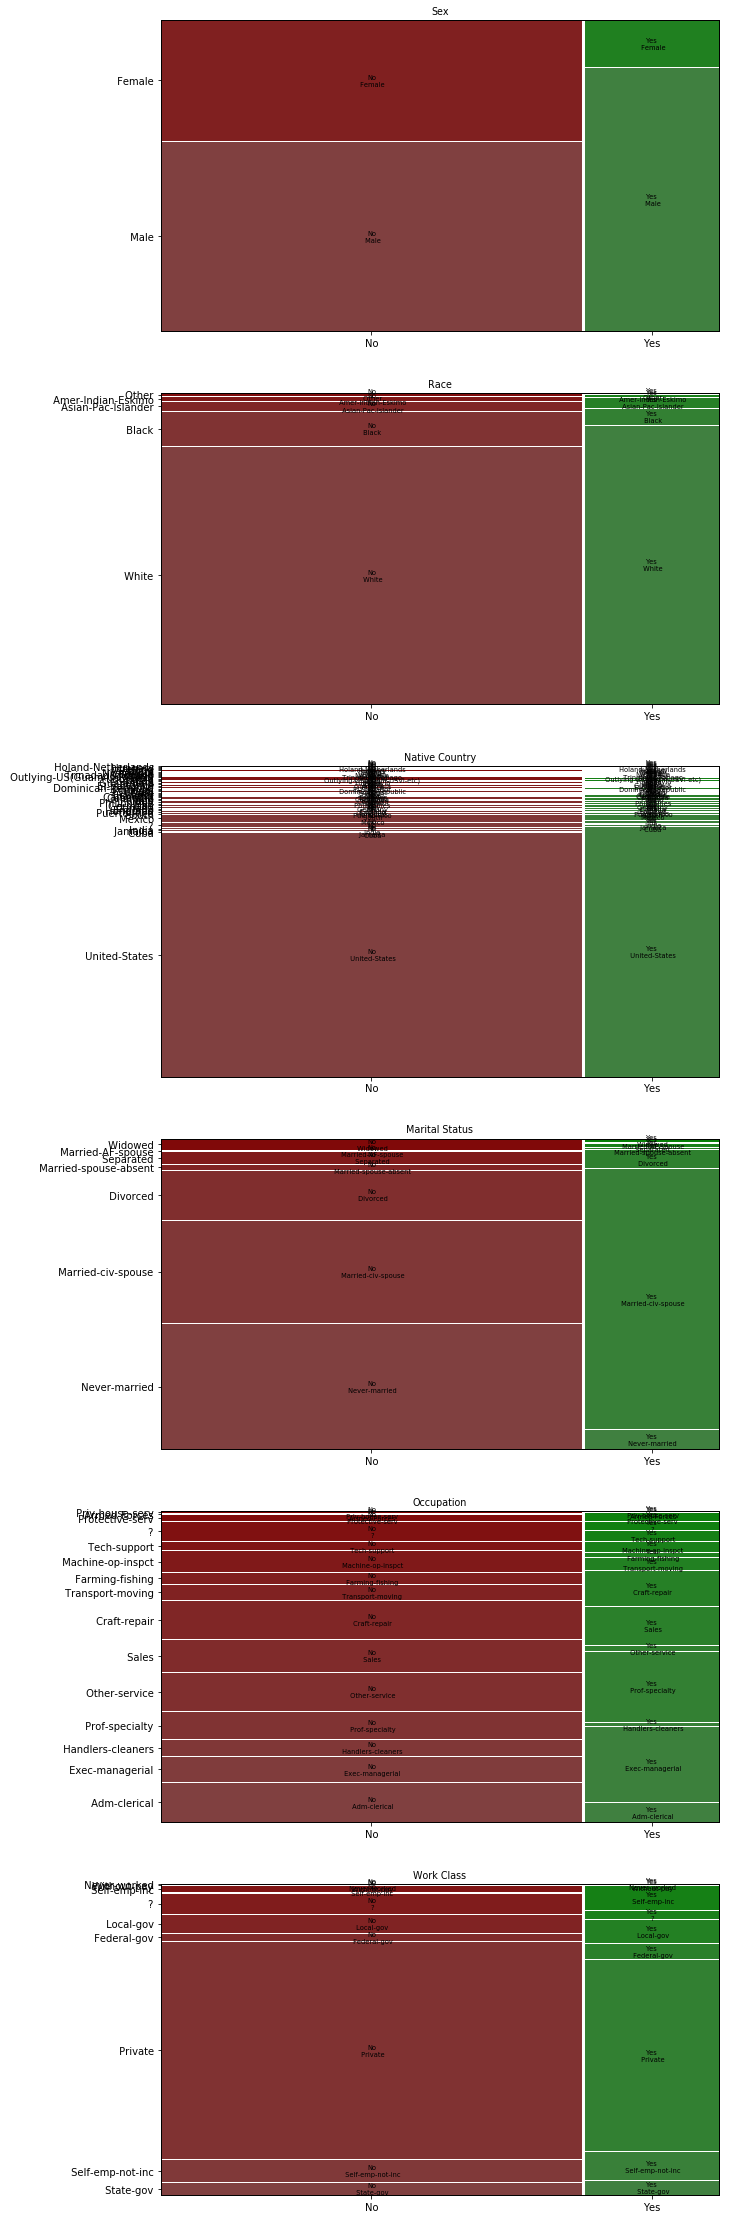

In [6]:
#Distribution of entries in accordance with categorical attributes

fig, ax = plt.subplots(6,1)
fig.set_size_inches(10, 40)

matplotlib.rcParams.update({'font.size': 8})
fig, rect = mosaic(dataset, ['income_high','sex'], title='Sex', ax=ax[0]);

fig, rect = mosaic(dataset, ['income_high','race'], title='Race', ax=ax[1]);

fig, rect = mosaic(dataset, ['income_high','native_country'], title='Native Country', ax=ax[2]);

fig, rect = mosaic(dataset, ['income_high','marital_status'], title='Marital Status', ax=ax[3]);

fig, rect = mosaic(dataset, ['income_high','occupation'], title='Occupation', ax=ax[4]);

fig, rect = mosaic(dataset, ['income_high','workclass'], title='Work Class', ax=ax[5]);


***

<font color='red'>
    
**The distribution of categorical attributes of the dataset shows;**

-Male people, white people, United States originated people, civilian married couples and managerial level people tend to have high income 

-Workclass, race and native_country attributes have less effect on income level because there are little change yes and no for sub-groups of them
***

</font>

### Data Preprocessing

##### Drop unimportant columns

In [7]:
dataset = dataset.drop('ID', axis=1)

***

<font color='red'>
    
**ID column shows just the indexes of the rows, does not carry important information**

***

</font>

##### Duplicated Entries

In [8]:
#Duplicated data search

dataset.duplicated().value_counts()

False    28219
True      4342
dtype: int64

In [9]:
#Drop duplicates

dataset = dataset.drop_duplicates()

***

<font color='red'>
    
**There were 4.342 duplicated entries in the dataset and they were removed**

Now, there are 28.219 rows remaining

***

</font>

##### Outliers

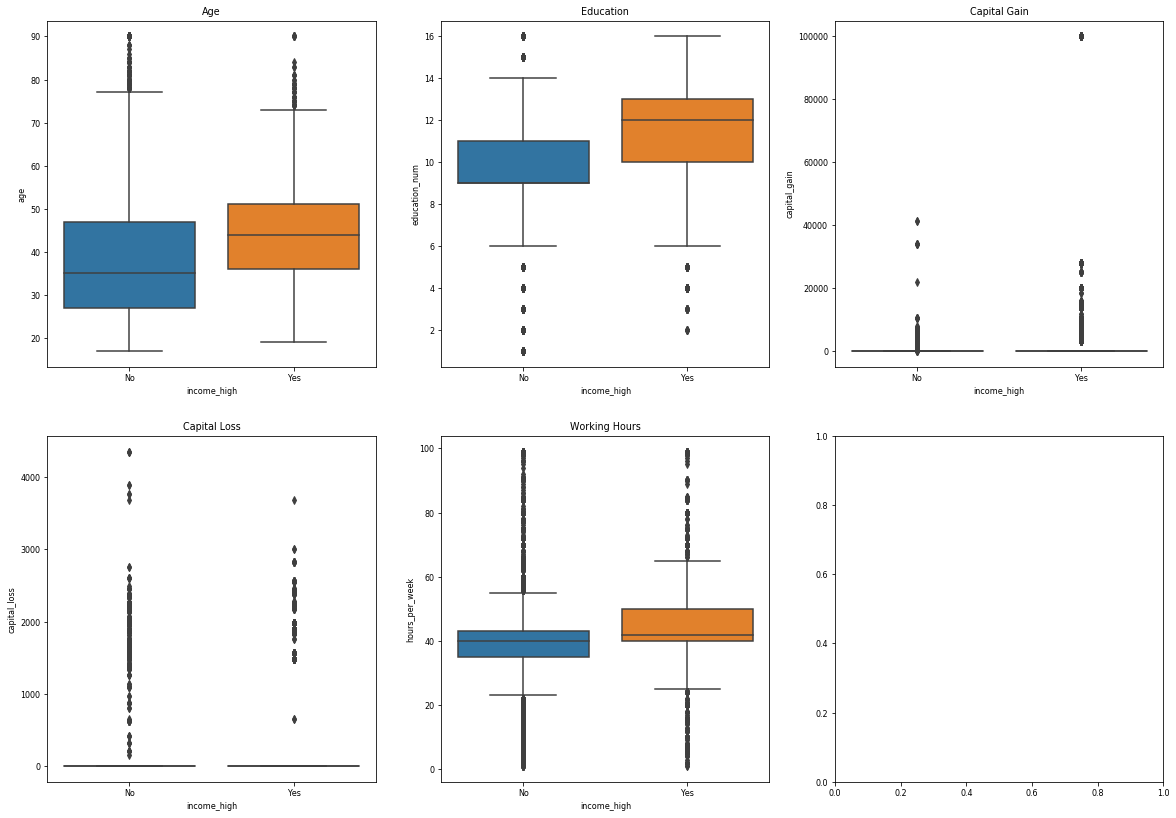

In [10]:
#Visualizing outliers

f, ax = plt.subplots(2,3)
f.set_size_inches(20,14)

sns.boxplot(x=dataset.income_high, y=dataset.age, ax = ax[0,0]);
sns.boxplot(x=dataset.income_high, y=dataset.education_num, ax = ax[0,1]); 
sns.boxplot(x=dataset.income_high, y=dataset.capital_gain, ax = ax[0,2]); 
sns.boxplot(x=dataset.income_high, y=dataset.capital_loss, ax = ax[1,0]); 
sns.boxplot(x=dataset.income_high, y=dataset.hours_per_week, ax = ax[1,1]); 

ax[0,0].set_title('Age');
ax[0,1].set_title('Education');
ax[0,2].set_title('Capital Gain');
ax[1,0].set_title('Capital Loss');
ax[1,1].set_title('Working Hours');

In [11]:
#Removing outliers

#For 'Age' attribute

Q1 = dataset.age.quantile(q=0.25)
Q3 = dataset.age.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['age'] > minimum) & (dataset['age'] < maximum)]

#For 'Education' attribute

Q1 = dataset.education_num.quantile(q=0.25)
Q3 = dataset.education_num.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['education_num'] > minimum) & (dataset['education_num'] < maximum)]


#For 'Working Hours' attribute

Q1 = dataset.hours_per_week.quantile(q=0.25)
Q3 = dataset.hours_per_week.quantile(q=0.75)
IQR = Q3 - Q1
minimum = Q1 - IQR*1.5
maximum = Q3 + IQR*1.5
dataset = dataset[(dataset['hours_per_week'] > minimum) & (dataset['hours_per_week'] < maximum)]


dataset = dataset.reset_index(drop=True)

***

<font color='red'>
    
**There are 19.424 rows remaining instead of 28.219 after removal of outliers**

***

</font>

##### Removing null values

In [12]:
#Search for the names of each sub-groups of attributes

print(dataset.workclass.unique())
print(dataset.marital_status.unique())
print(dataset.occupation.unique())
print(dataset.race.unique())
print(dataset.sex.unique())
print(dataset.native_country.unique())

[' State-gov' ' Private' ' Self-emp-not-inc' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Never-married' ' Divorced' ' Married-civ-spouse' ' Separated'
 ' Married-spouse-absent' ' Widowed' ' Married-AF-spouse']
[' Adm-clerical' ' Handlers-cleaners' ' Prof-specialty' ' Exec-managerial'
 ' Sales' ' Craft-repair' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Protective-serv' ' Other-service'
 ' ?' ' Armed-Forces' ' Priv-house-serv']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' India' ' ?' ' Mexico' ' Puerto-Rico'
 ' England' ' Canada' ' Germany' ' Iran' ' Philippines' ' Italy' ' Poland'
 ' Cambodia' ' Ecuador' ' Laos' ' Taiwan' ' Portugal' ' France'
 ' El-Salvador' ' South' ' Dominican-Republic' ' Jamaica' ' Honduras'
 ' Haiti' ' China' ' Japan' ' Yugoslavia' ' Peru'
 ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago' ' Greece'
 ' N

In [13]:
#Removing the "?" entries

for i in range(dataset.shape[0]):
    for j in range(dataset.shape[1]):
        if dataset.iloc[i, j] == " ?":
            dataset.iloc[i, j] = np.nan
        
dataset = dataset.dropna(how="any")

***

<font color='red'>
    
**"?" entries are removed from the dataset**

Now, there are 18.310 rows instead of 19.424

***

</font>

##### Correlation

In [14]:
#Chi2 correlation search between independent categorical and taget variables 

le = LabelEncoder()
X = dataset.loc[:,'age':'native_country']
X = X.select_dtypes(include=np.object) # select string columns
X = X.apply(LabelEncoder().fit_transform)
y = le.fit_transform(dataset.loc[:,'income_high'])
chi2, pval=feature_selection.chi2(X, y)
sorted_idx = np.argsort(chi2)[::-1]
sorted_vals = np.sort(chi2)[::-1]


d = {"features":X.columns[sorted_idx], "values":sorted_vals, "p-values":pval[sorted_idx]}
df = pd.DataFrame(d)
df

,features,values,p-values
0,marital_status,389.052548,1.330882e-86
1,sex,264.399899,1.885704e-59
2,occupation,168.561426,1.525362e-38
3,race,35.892447,2.085154e-09
4,native_country,14.801615,1.194332e-04
5,workclass,0.078170,7.797929e-01


***

<font color='red'>
    
**All the categorical attributes, except workclass, have statistical significance because their p-values are less than 5%**

Additionally, the most correlated categorical attributes with income level; marital_status, sex, occupation, race, native country and workclass respectively.

***

</font>

In [15]:
#Correlation between numerical attributes and income level

X = dataset
X = dataset.select_dtypes(include=np.number) # select numeric columns

y = dataset.loc[:,'income_high']
y = y.replace(["yes","no"],[1,-1])
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)

sorted_idx = np.argsort(selector.scores_)[::-1]
sorted_vals = np.sort(selector.scores_)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals, "p-values":selector.pvalues_[sorted_idx]}
df = pd.DataFrame(d)
df

,features,values,p-values
0,education_num,2161.351024,0.000000e+00
1,age,1002.215356,3.405307e-214
2,capital_gain,928.133001,6.747709e-199
3,hours_per_week,620.939857,8.179325e-135
4,capital_loss,371.711718,5.156279e-82


***

<font color='red'>
    
**All the numerical attributes have statistical significance because their p-values are less than 5%**

Additionally, the most correlated numerical attributes with income level; education_num, age, capital_gain, hours_per_wek and capital_loss respectively.

***

</font>

##### Divide the dataset as independent variables and target variable

In [16]:
target = dataset.income_high
dataset = dataset.drop(['income_high'], axis=1)

##### Assigning dummy variables for categorical attributes

In [17]:
dataset = pd.get_dummies(dataset)

### Data Modelling

In [18]:
#Splitting dataset into train and test sets

x_train, x_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2)

***

<font color='red'>
    
**Dividing the dataset into two; 80% for training and 20% for testing**


***

</font>

##### Model 1 - Using all  attributes

In [19]:
x_train1 = x_train.copy()
x_test1 = x_test.copy()

LogR = LogisticRegression()
Model = LogR.fit(x_train1, y_train)
Pred1 = Model.predict(x_test1)

ACC1 = round(accuracy_score(y_test, Pred1), 3)

ACC1 #Accuracy score of Model 1

C:\Users\fetih.kaya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.83

##### Model 2 - Using only statsitically significant attributes

In [20]:
#Dropping workclass attribute

x_train2 = x_train.copy()
x_train2 = x_train2.drop(['workclass_ State-gov', 'workclass_ Private', 'workclass_ Self-emp-not-inc', 'workclass_ Federal-gov', 
                          'workclass_ Local-gov', 'workclass_ Self-emp-inc', 'workclass_ Without-pay'], axis=1)
x_test2 = x_test.copy()
x_test2 = x_test2.drop(['workclass_ State-gov', 'workclass_ Private', 'workclass_ Self-emp-not-inc', 'workclass_ Federal-gov', 
                        'workclass_ Local-gov', 'workclass_ Self-emp-inc', 'workclass_ Without-pay'], axis=1)

LogR = LogisticRegression()
Model = LogR.fit(x_train2, y_train)
Pred2 = Model.predict(x_test2)

ACC2 = round(accuracy_score(y_test, Pred2), 3)

ACC2 #Accuracy score of Model 2

C:\Users\fetih.kaya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.83

##### Model 3 - Apply Hyperparameter Tuning the Best Scored Model, Model 2

In [21]:
#Hyperparameter Tuning

def report(results, n_top=30): #print all results
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
#Logistic Regression random search
clf = LogisticRegression()
param_grid = {"solver": ["lbfgs", "liblinear"],
              "max_iter": [5, 10, 25, 50, 100 ,200, 500, 1000],
             }

n_iter_search = 15
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=n_iter_search, cv=5)

simplefilter('ignore')

start = time.time()
random_search.fit(x_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 21.33 seconds for 15 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.824 (std: 0.002)
Parameters: {'solver': 'lbfgs', 'max_iter': 1000}

Model with rank: 2
Mean validation score: 0.821 (std: 0.004)
Parameters: {'solver': 'lbfgs', 'max_iter': 500}

Model with rank: 3
Mean validation score: 0.819 (std: 0.004)
Parameters: {'solver': 'liblinear', 'max_iter': 100}

Model with rank: 3
Mean validation score: 0.819 (std: 0.004)
Parameters: {'solver': 'liblinear', 'max_iter': 200}

Model with rank: 3
Mean validation score: 0.819 (std: 0.004)
Parameters: {'solver': 'liblinear', 'max_iter': 500}

Model with rank: 3
Mean validation score: 0.819 (std: 0.004)
Parameters: {'solver': 'liblinear', 'max_iter': 50}

Model with rank: 3
Mean validation score: 0.819 (std: 0.004)
Parameters: {'solver': 'liblinear', 'max_iter': 1000}

Model with rank: 8
Mean validation score: 0.819 (std: 0.006)
Parameters: {'solver': 'liblinear', 'max_iter': 25}

Model with r

In [22]:
x_train3 = x_train.copy()
x_train3 = x_train3.drop(['workclass_ State-gov', 'workclass_ Private', 'workclass_ Self-emp-not-inc', 'workclass_ Federal-gov', 
                          'workclass_ Local-gov', 'workclass_ Self-emp-inc', 'workclass_ Without-pay'], axis=1)
x_test3 = x_test.copy()
x_test3 = x_test3.drop(['workclass_ State-gov', 'workclass_ Private', 'workclass_ Self-emp-not-inc', 'workclass_ Federal-gov', 
                        'workclass_ Local-gov', 'workclass_ Self-emp-inc', 'workclass_ Without-pay'], axis=1)

LogR = LogisticRegression(solver='lbfgs', max_iter=1000)
Model = LogR.fit(x_train3, y_train)
Pred3 = Model.predict(x_test3)

ACC3 = round(accuracy_score(y_test, Pred3), 3)

ACC3 #Accuracy score of Model 3

0.837

##### Comparison of the Models

In [24]:
models = pd.DataFrame(["Model 1", "Model 2", "Model 3"], columns =["Model"])
accuracies= pd.DataFrame([ACC1, ACC2, ACC3], columns=["Accuracy Score"])
comparison = pd.concat([models,accuracies], axis=1)
comparison  = comparison.sort_values(["Accuracy Score"], ascending = False)
comparison  = comparison.reset_index(drop=True)

comparison

,Model,Accuracy Score
0,Model 3,0.837
1,Model 1,0.830
2,Model 2,0.830


### SUMMARY

***

    
**Maximum reached accuracy score for the dataset is 0.837 with logistic regression modelling**

-It has been monitored from the graphs drawn in the explanatory data analysis stage that; working hours, workclass, race and native_country attributes have less effect on income level. They were proved on the data preprocessing stage by correlation search

-On the data preprocessing stage;

    -Unimportant column which is ID was removed, 
    -The hidden null values which are entered as "?" and cannot seen by null searching, detected and removed, 
    -Duplicated rows were removed
    -Dummy variables for categorical attributes were assigned
    -18.310 rows and 81 columns were reached at the end of preprocessing

-The correlation results showed that; all the given attributes, except workclass, have statistical significance for modelling by having less than 5% p-values

-To reach the best performing model; 

    -First all the attributes were used for modelling and 0.83 accuracy score taken in Model 1
    -After that, the workclass attribute which is statistically insignificant were removed and again 0.83 accuracy score were reached with less attributes in Model 2
    -Finally, hyperparameter tuning was applied to logistic regression and 0.837 accuracy score were reached in Model 3


***